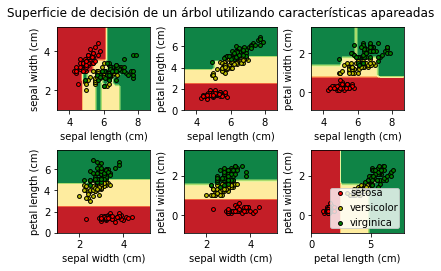

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parametros
n_classes = 3
plot_colors = "ryg"
plot_step = 0.2

# Carga de datos
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
  # Solo nos centramos en 2 caracteristicas
  X = iris.data[:, pair]
  y = iris.target

  # entrenamiento
  clf = DecisionTreeClassifier().fit(X, y)

  # ploteamos la decisión de frontera
    
  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
  np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  # ploteamos los puntos de entrenamiento
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Superficie de decisión de un árbol utilizando características apareadas")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()